In [0]:
from sklearn import decomposition    
import matplotlib.pyplot as plt 
import numpy as np   
import scipy.ndimage
import time
import warnings
%matplotlib inline


In [2]:
warnings.filterwarnings('ignore')
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving proba_original.jpeg to proba_original.jpeg
Saving proba_noisy.jpeg to proba_noisy.jpeg
Saving cameraman_original.jpeg to cameraman_original.jpeg
Saving cameraman_noisy.jpeg to cameraman_noisy.jpeg
Saving balloons_original.png to balloons_original.png
Saving balloons_noisy.jpeg to balloons_noisy.jpeg


In [0]:
data = scipy.ndimage.imread("cameraman_noisy.jpeg", mode='L')
golden_data = scipy.ndimage.imread("cameraman_original.jpeg", mode='L')

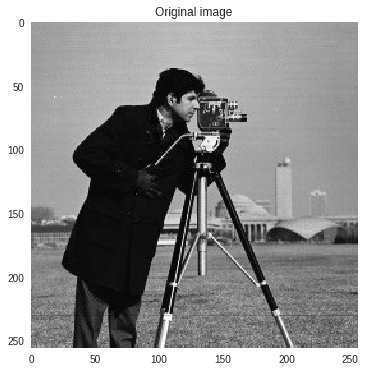

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(golden_data, cmap=plt.cm.gray, interpolation='nearest')

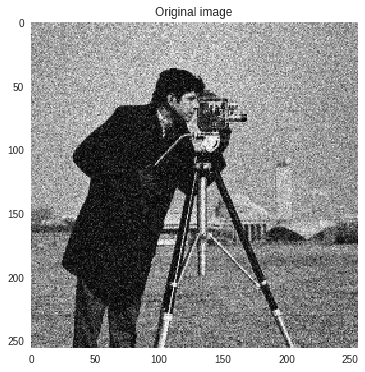

In [14]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')

In [0]:

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

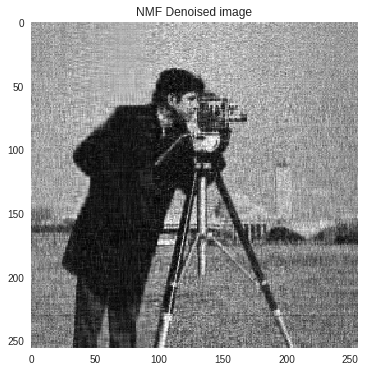

In [16]:
n_components = 60

start = time.time()

vmax = max(data.max(), -data.min())
estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-4, max_iter=500)
W = estimator.fit_transform(data)
H = estimator.components_
     
new_img = np.dot(W,H)

end = time.time()


fig, ax = plt.subplots()
ax.grid(False)
plt.title("NMF Denoised image")
plt.imshow(new_img, cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)


In [17]:
difference = new_img - golden_data
print("Frobenius distance    ",np.linalg.norm(difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, new_img))

Frobenius distance     5006.859749247043
Time for calculation   1.9140613079071045
PSNR                   22.30429439023802


Text(0.5, 1.0, 'Residuals')

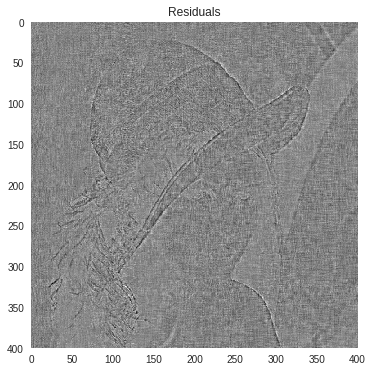

In [11]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(difference, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Residuals")